In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [6]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [8]:
df.describe

<bound method NDFrame.describe of    Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
5    absent    1       2     16
6    absent   61       2     17
7    absent   37       3     16
8    absent  113       2     16
9   present   59       6     12
10  present   82       5     14
11   absent  148       3     16
12   absent   18       5      2
13   absent    1       4     12
14   absent  168       3     18
15   absent    1       3     16
16   absent   78       6     15
17   absent  175       5     13
18   absent   80       5     16
19   absent   27       4      9
20   absent   22       2     16
21  present  105       6      5
22  present   96       3     12
23   absent  131       2      3
24  present   15       7      2
25   absent    9       5     13
26   absent    8       3      6
27   absent  100       3     14
28   absent    4       3     16
29   a

In [9]:
df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


/home/deepanshu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


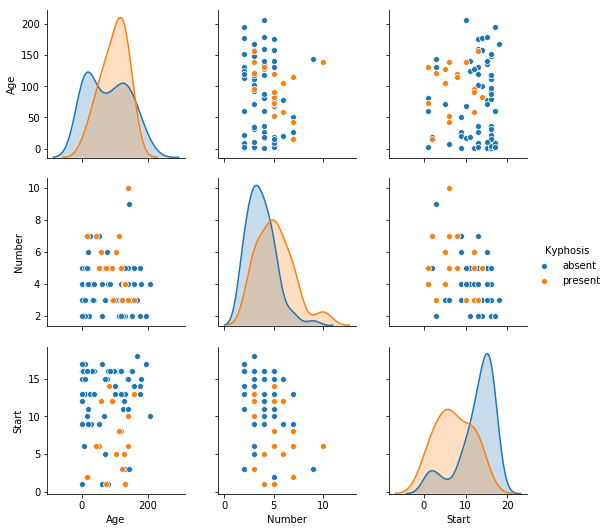

In [10]:
sns.pairplot(data=df,hue='Kyphosis')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('Kyphosis',axis=1)

In [13]:
y=df['Kyphosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier()

In [17]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
predictions = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[15  6]
 [ 2  2]]


              precision    recall  f1-score   support

      absent       0.88      0.71      0.79        21
     present       0.25      0.50      0.33         4

   micro avg       0.68      0.68      0.68        25
   macro avg       0.57      0.61      0.56        25
weighted avg       0.78      0.68      0.72        25



In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier()

In [23]:
rfc.fit(X_train,y_train)

/home/deepanshu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
rfc_pred = rfc.predict(X_test)

In [27]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[18  3]
 [ 3  1]]


              precision    recall  f1-score   support

      absent       0.86      0.86      0.86        21
     present       0.25      0.25      0.25         4

   micro avg       0.76      0.76      0.76        25
   macro avg       0.55      0.55      0.55        25
weighted avg       0.76      0.76      0.76        25



In [28]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [29]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

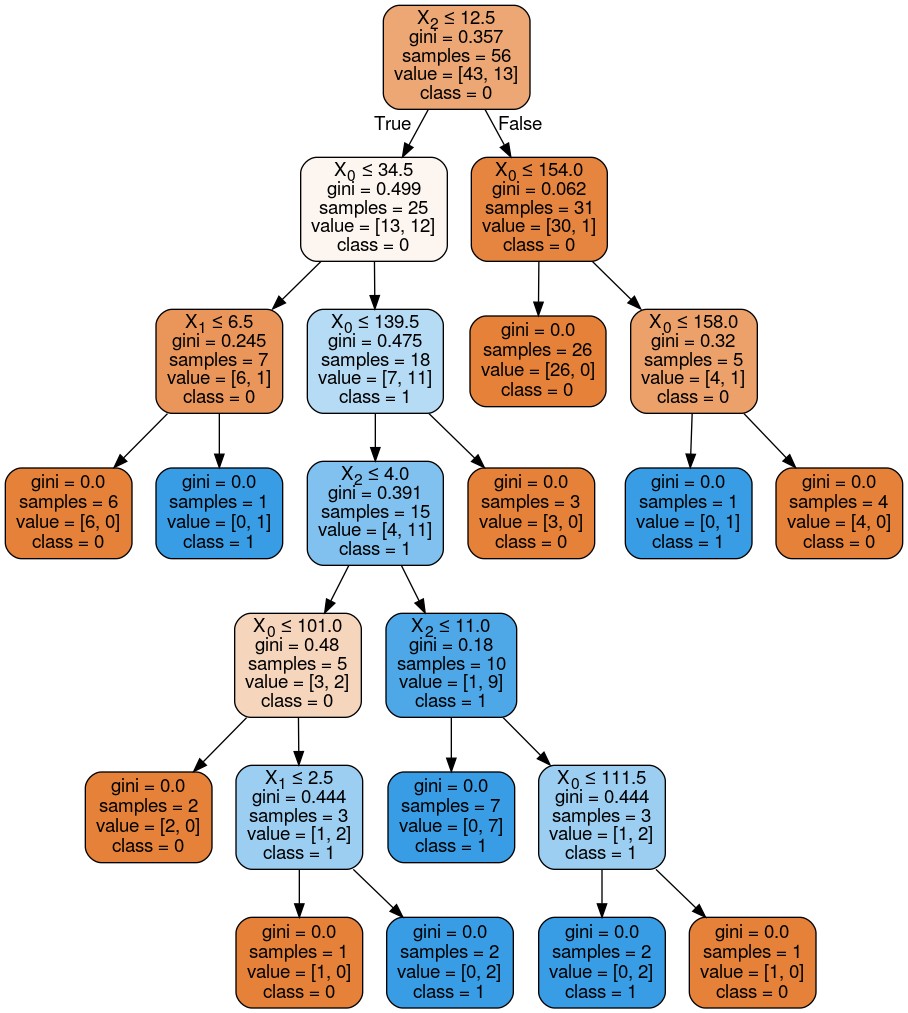

In [30]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [31]:
dot_data=StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


NameError: name 'pydotplus' is not defined